In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [8]:
#This is the equivalent of ncdump

filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_rad_1979_2020.nc'
#filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_stf_1979_2020.nc'
#filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_radcs_1979_2020.nc'
#filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_hydro_1979_2020.nc'

with xr.open_dataset(filesource) as ds:
    print (ds.variables)

Frozen({'time': <xarray.IndexVariable 'time' (time: 504)>
array(['1979-01-01T00:00:00.000000000', '1979-02-01T00:00:00.000000000',
       '1979-03-01T00:00:00.000000000', ..., '2020-10-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T, 'longitude': <xarray.IndexVariable 'longitude' (longitude: 1440)>
array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
       3.5975e+02], dtype=float32)
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 721)>
array([ 90.  ,  89.75,  89.5 , ..., -89.5 , -89.75, -90.  ], dtype=float32)
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y, 'ssr': <xarray.Variable (time: 504, 

In [ ]:
import xarray as xr
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_rad_1979_2020.nc'

with xr.open_dataset(filesource) as ds:
    latitude = ds['latitude'].values
    ssr = ds['ssr'].mean(['time','longitude']).values#incoming, from solar, positive is down
    stherm = ds['str'].mean(['time','longitude']).values#incoming, from atmosphere, positive is down
    tsr = ds['tsr'].mean(['time','longitude']).values#outgoing, TOA, shortwave, mostly incoming, positive is down
    ttr = ds['ttr'].mean(['time','longitude']).values#outgoing, TOA, longwave/thermal, mostly outgoing, positive is down

In [5]:
import xarray as xr
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_stf_1979_2020.nc'

with xr.open_dataset(filesource) as ds:
    latitude = ds['latitude'].values
    slhf = ds['slhf'].mean(['time','longitude']).values#latent heat flux
    sshf = ds['sshf'].mean(['time','longitude']).values#sensible heat flux

In [6]:
import xarray as xr
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_radcs_1979_2020.nc'

with xr.open_dataset(filesource) as ds:
    latitude = ds['latitude'].values
    ssrc = ds['ssrc'].mean(['time','longitude']).values#incoming, from solar, positive is down
    strc = ds['strc'].mean(['time','longitude']).values#incoming, from atmosphere, positive is down
    tsrc = ds['tsrc'].mean(['time','longitude']).values#outgoing, TOA, shortwave, mostly incoming, positive is down
    ttrc = ds['ttrc'].mean(['time','longitude']).values#outgoing, TOA, longwave/thermal, mostly outgoing, positive is down

Text(0.5, 0, 'latitude')

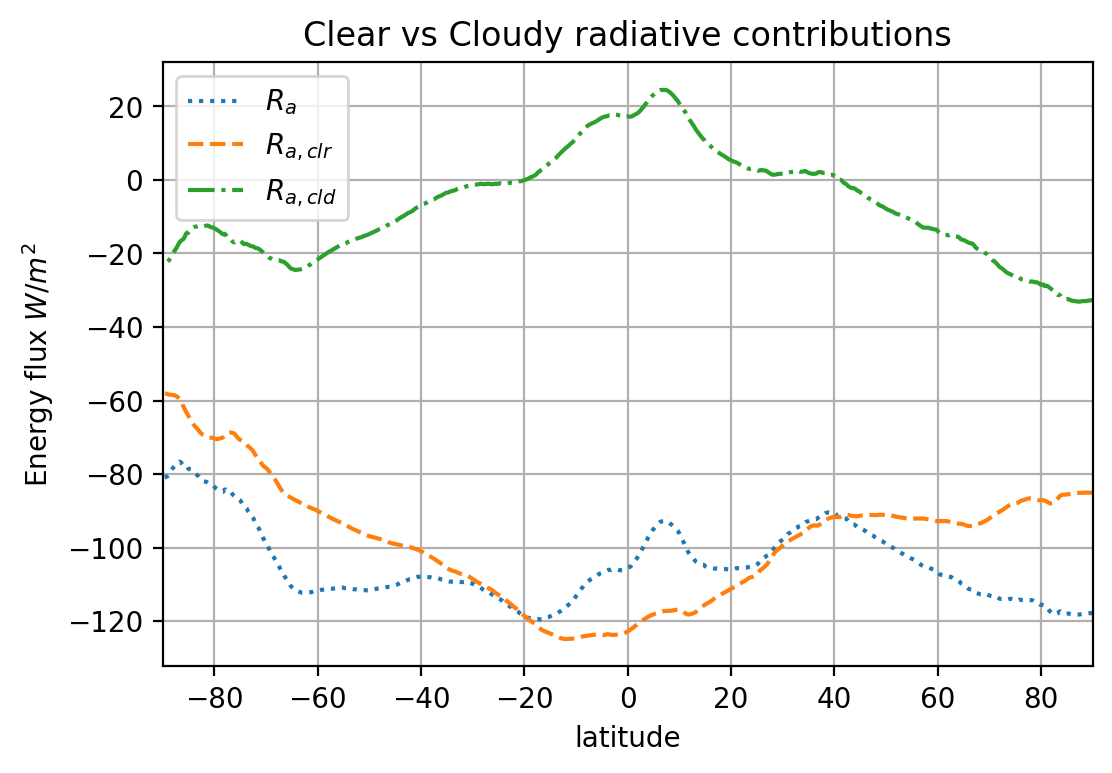

In [36]:
tot_rad = -ssr-stherm+tsr+ttr
clear_rad = (tsrc+ttrc-ssrc-strc)
cloud_rad = tot_rad-clear_rad
DFa = tot_rad-slhf-sshf
time_norm = 86400#seconds per day
lns=[]
plt.figure(dpi=200)
#lns=lns+plt.plot(latitude,ssr/time_norm,linestyle='dotted',label='surface shortwave')
#lns=lns+plt.plot(latitude,stherm/time_norm,linestyle='dashed',label='surface longwave')
#lns=lns+plt.plot(latitude,-(ssr+stherm)/time_norm,linestyle='dotted',label='total')
#lns=lns+plt.plot(latitude,tsr/time_norm,linestyle='dashdot',label='solar')
#lns=lns+plt.plot(latitude,ttr/time_norm,label='thermal')
#lns=lns+plt.plot(latitude,(tsr+ttr)/time_norm,linestyle='dotted',label='total')
#lns=lns+plt.plot(latitude,ssrc/time_norm,linestyle='dotted',label='shortwave CS')
#lns=lns+plt.plot(latitude,strc/time_norm,linestyle='dashed',label='longwave CS')
#lns=lns+plt.plot(latitude,-(ssrc+strc)/time_norm,linestyle='dashed',label='CS')
#lns=lns+plt.plot(latitude,tsrc/time_norm,linestyle='dashdot',label='solar CS')
#lns=lns+plt.plot(latitude,ttrc/time_norm,label='thermal CS')
#lns=lns+plt.plot(latitude,(tsrc+ttrc)/time_norm,linestyle='dashed',label='CS')
#lns=lns+plt.plot(latitude,(tsr-tsrc)/time_norm,linestyle='dashdot',label='solar CRE')
#lns=lns+plt.plot(latitude,(ttr-ttrc)/time_norm,label='thermal CRE')
#lns=lns+plt.plot(latitude,(tsr-tsrc+ttr-ttrc)/time_norm,linestyle='dashdot',label='CRE')
#lns=lns+plt.plot(latitude,-(ssr-ssrc+stherm-strc)/time_norm,linestyle='dashdot',label='CRE')
#lns=lns+plt.plot(latitude,(ssr-ssrc)/time_norm,linestyle='dotted',label='shortwave CRE')
#lns=lns+plt.plot(latitude,(stherm-strc)/time_norm,linestyle='dashed',label='longwave CRE')
lns=lns+plt.plot(latitude,tot_rad/time_norm,linestyle='dotted',label=r'$R_a$')
lns=lns+plt.plot(latitude,clear_rad/time_norm,linestyle='dashed',label=r'$R_{a,clr}$')
lns=lns+plt.plot(latitude,cloud_rad/time_norm,linestyle='dashdot',label=r'$R_{a,cld}$')
#lns=lns+plt.plot(latitude,-slhf/time_norm,linestyle='dashed',label='LE')
#lns=lns+plt.plot(latitude,-sshf/time_norm,linestyle='dashdot',label='SH')
#lns=lns+plt.plot(latitude,DFa/time_norm,label=r'$\Delta F_a$')
plt.xlim(latitude.min(), latitude.max())
plt.grid(True)
plt.legend(loc=0)
#plt.title('TOA radiation decomposition')
#plt.title('Surface radiation decomposition')
plt.title('Clear vs Cloudy radiative contributions')
plt.ylabel(r'Energy flux $W/m^2$')
plt.xlabel('latitude')

Text(0.5, 1.0, 'Contributions to $R_1$ from CRE and clear sky effects')

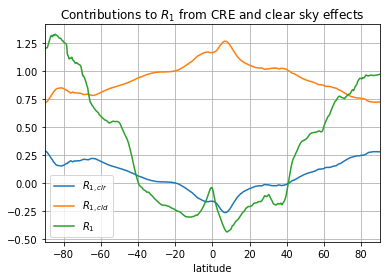

In [48]:
plt.figure(dpi=200)
lns=[]
lns=lns+plt.plot(latitude,(tot_rad-clear_rad)/tot_rad,label=r'$R_{1,clr}$')
lns=lns+plt.plot(latitude,(tot_rad-cloud_rad)/tot_rad,label=r'$R_{1,cld}$')
lns = lns+plt.plot(latitude, (1-(slhf+sshf)/tot_rad),label=r'$R_1$')
plt.xlim(latitude.min(), latitude.max())
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('latitude')
plt.title(r'Contributions to $R_1$ from CRE and clear sky effects')

Surface radiation
TOA radiation
Total radiation


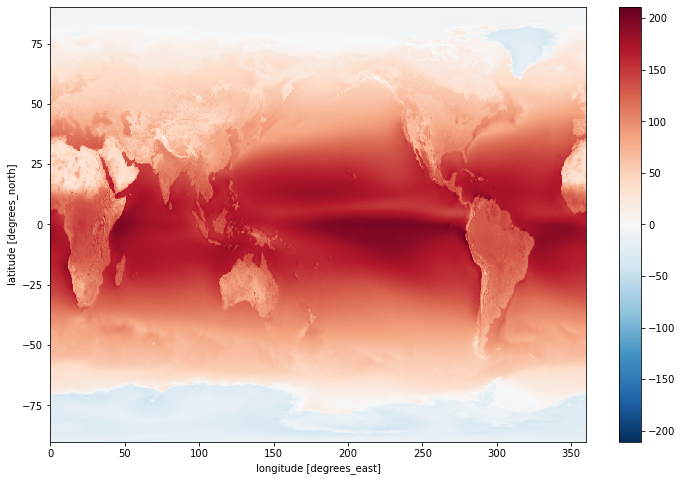

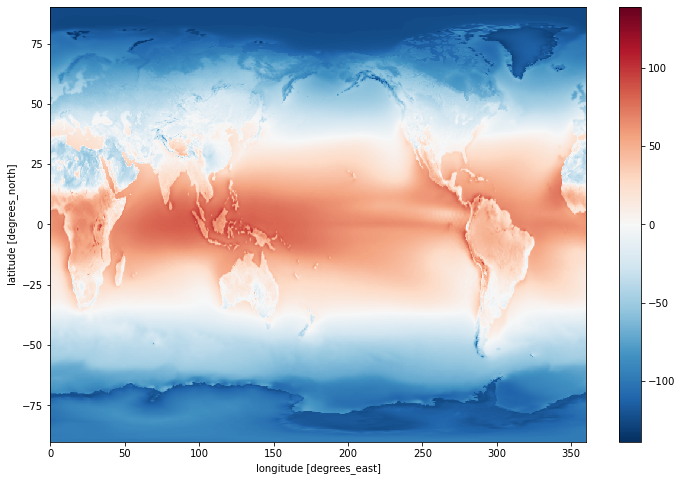

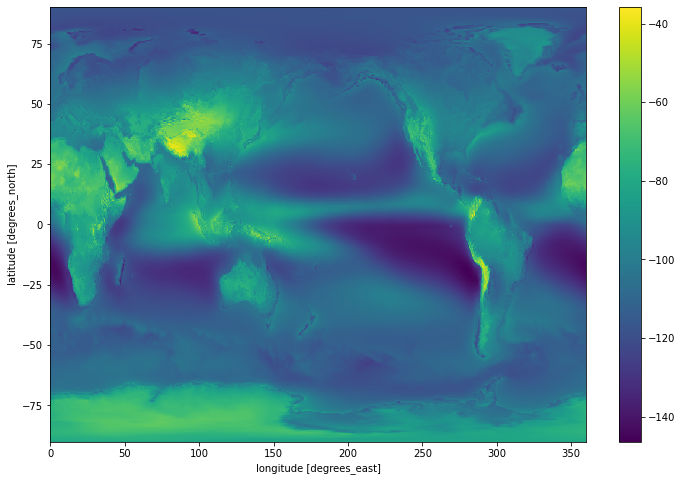

In [3]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_rad_1979_2020.nc'
time_norm = 86400

with xr.open_dataset(filesource) as ds:
    surface=(ds['ssr'].mean(['time'])+ds['str'].mean('time'))/time_norm
    print ('Surface radiation')
    surface.plot(aspect=1.5,size=8)
    toa=(ds['tsr'].mean(['time'])+ds['ttr'].mean('time'))/time_norm
    print ('TOA radiation')
    toa.plot(aspect=1.5,size=8)
    print ('Total radiation')
    tot=toa-surface
    tot.plot(aspect=1.5,size=8)

Clear Sky Surface Radiation
Clear Sky TOA Radiation
Clear Sky Total Radiation


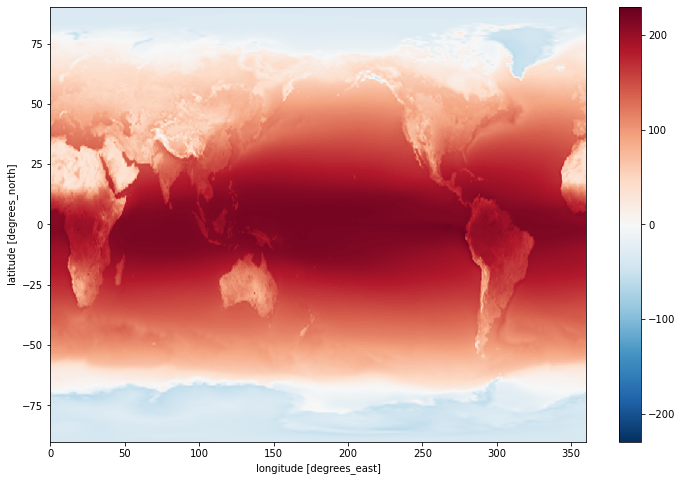

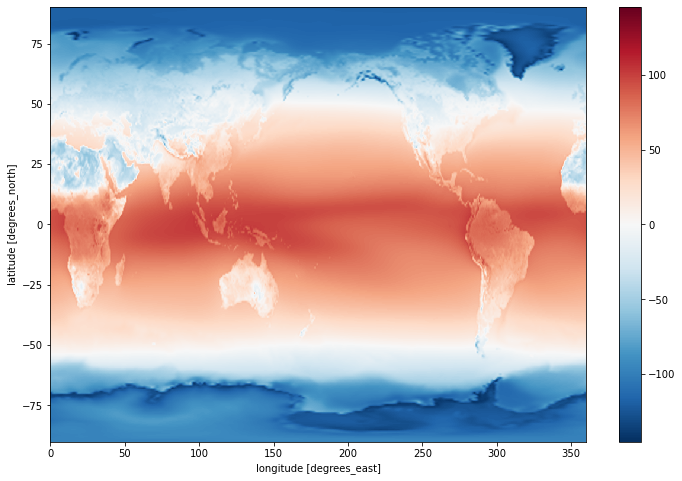

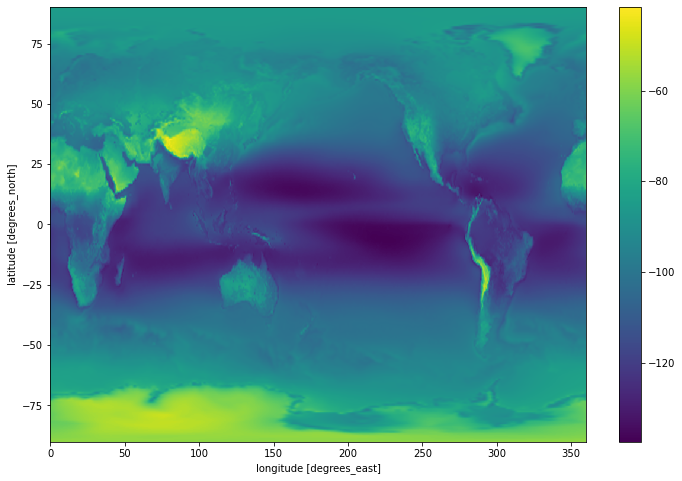

In [4]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_radcs_1979_2020.nc'
time_norm = 86400

with xr.open_dataset(filesource) as ds:
    surfacecs=(ds['ssrc']/time_norm).mean(['time'])+(ds['strc']/time_norm).mean('time')
    print ('Clear Sky Surface Radiation')
    surfacecs.plot(aspect=1.5,size=8)
    toacs=(ds['tsrc'].mean(['time'])+ds['ttrc'].mean('time'))/time_norm
    print ('Clear Sky TOA Radiation')
    toacs.plot(aspect=1.5,size=8)
    totcs=toacs-surfacecs
    print('Clear Sky Total Radiation')
    totcs.plot(aspect=1.5,size=8)

CRE Surface
CRE TOA
CRE Total


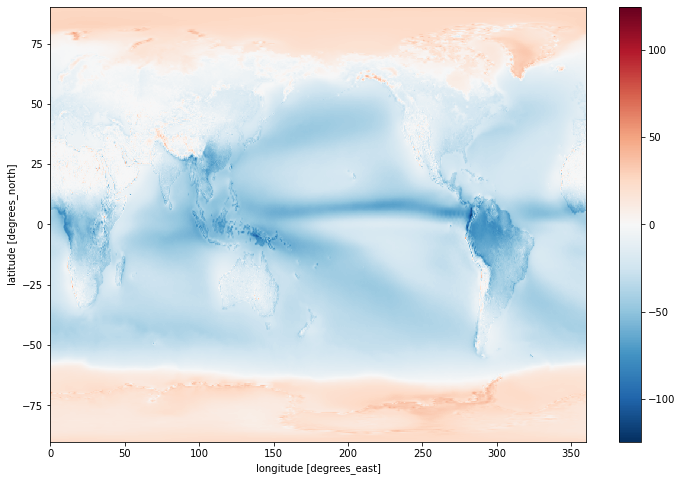

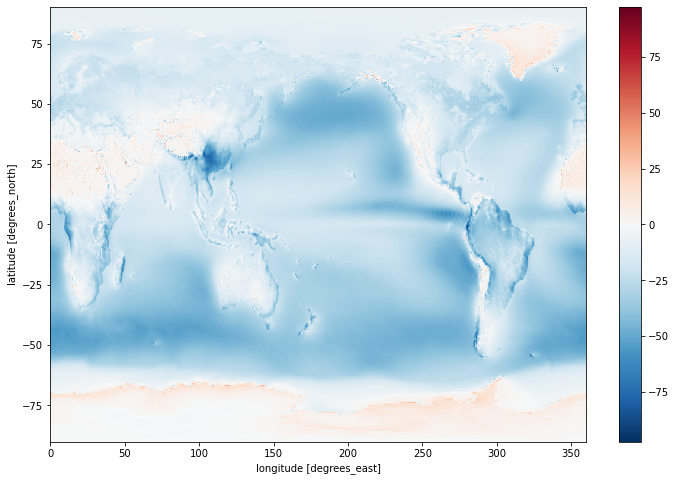

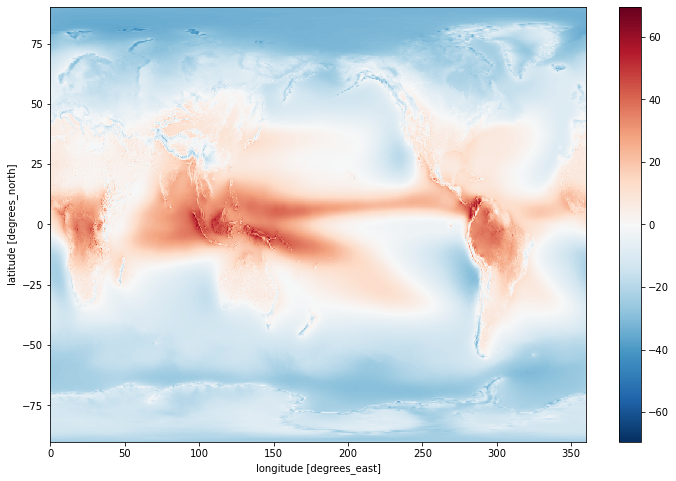

In [5]:
surface_cre = surface-surfacecs
toa_cre = toa-toacs
tot_cre=tot-totcs
print ('CRE Surface')
print ('CRE TOA')
print('CRE Total')
surface_cre.plot(aspect=1.5,size=8)
toa_cre.plot(aspect=1.5,size=8)
tot_cre.plot(aspect=1.5,size=8)

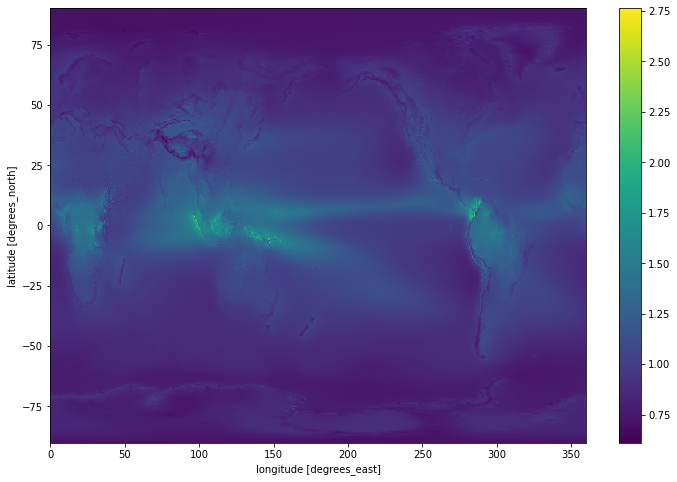

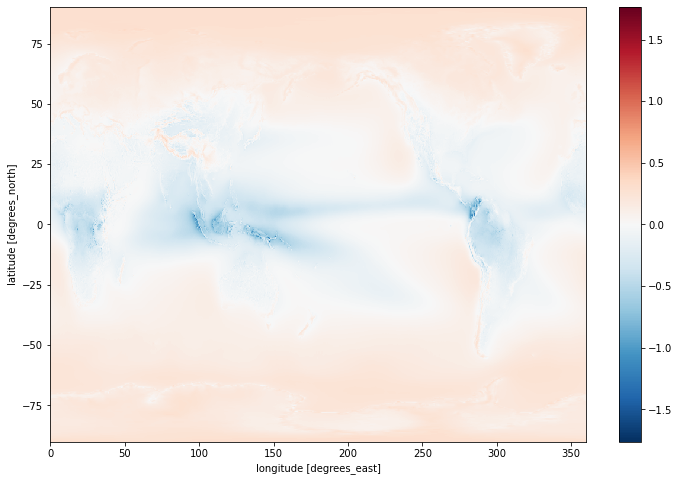

In [30]:
R1_CRE = 1-tot_cre/tot
R1_CRE.plot(aspect=1.5,size=8)
R1_CS = 1-totcs/tot
R1_CS.plot(aspect=1.5,size=8)

In [6]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_rad_1979_2020.nc'

with xr.open_dataset(filesource) as ds:
    spatial_avg=ds.mean(['latitude','longitude'])

In [7]:
print (spatial_avg.variables)

Frozen({'time': <xarray.IndexVariable 'time' (time: 504)>
array(['1979-01-01T00:00:00.000000000', '1979-02-01T00:00:00.000000000',
       '1979-03-01T00:00:00.000000000', ..., '2020-10-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T, 'ssr': <xarray.Variable (time: 504)>
array([11818498., 11395634., 10994084., 10834899., 10846676., 11106598.,
       11137252., 10910393., 10810718., 10942882., 11343546., 11890801.,
       11825997., 11431446., 11006430., 10893301., 10817858., 11164027.,
       11071147., 10932757., 10818638., 10958730., 11339119., 11943745.,
       11860183., 11338445., 11055383., 10854216., 10875268., 11139098.,
       11098236., 10955884., 10845667., 10992885., 11292515., 11767506.,
       11842347., 11435827., 10921755., 10777977., 10753653., 10988756.,
       11140366., 10806986., 10714921., 10840127., 112

In [20]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_rad_1979_2020.nc'
time_norm = 86400

with xr.open_dataset(filesource) as ds:
        jan = sum(ds[dict(time=12*y)] for y in range(0,42))/(time_norm*42)
        feb = sum(ds[dict(time=12*y+1)] for y in range(0,42))/(time_norm*42)
        mar = sum(ds[dict(time=12*y+2)] for y in range(0,42))/(time_norm*42)
        apr = sum(ds[dict(time=12*y+3)] for y in range(0,42))/(time_norm*42)
        may = sum(ds[dict(time=12*y+4)] for y in range(0,42))/(time_norm*42)
        jun = sum(ds[dict(time=12*y+5)] for y in range(0,42))/(time_norm*42)
        jul = sum(ds[dict(time=12*y+6)] for y in range(0,42))/(time_norm*42)
        aug = sum(ds[dict(time=12*y+7)] for y in range(0,42))/(time_norm*42)
        sep = sum(ds[dict(time=12*y+8)] for y in range(0,42))/(time_norm*42)
        octo = sum(ds[dict(time=12*y+9)] for y in range(0,42))/(time_norm*42)
        nov = sum(ds[dict(time=12*y+10)] for y in range(0,42))/(time_norm*42)
        dec = sum(ds[dict(time=12*y+11)] for y in range(0,42))/(time_norm*42)


In [25]:
djf = jan+feb+dec
mam = mar+apr+may
jja = jun+jul+aug
son = sep+octo+nov

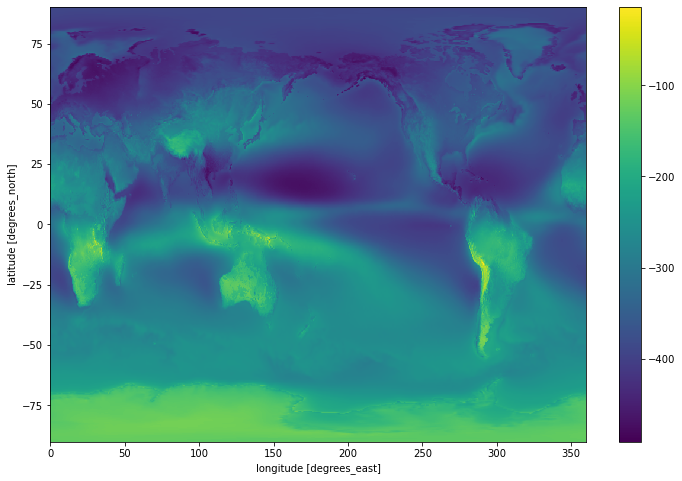

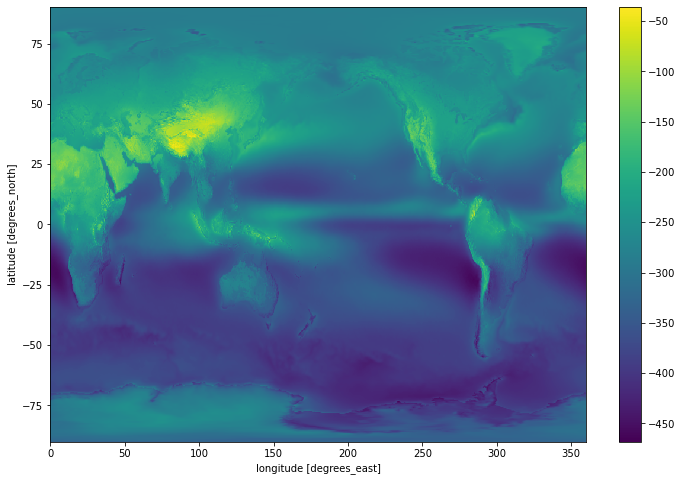

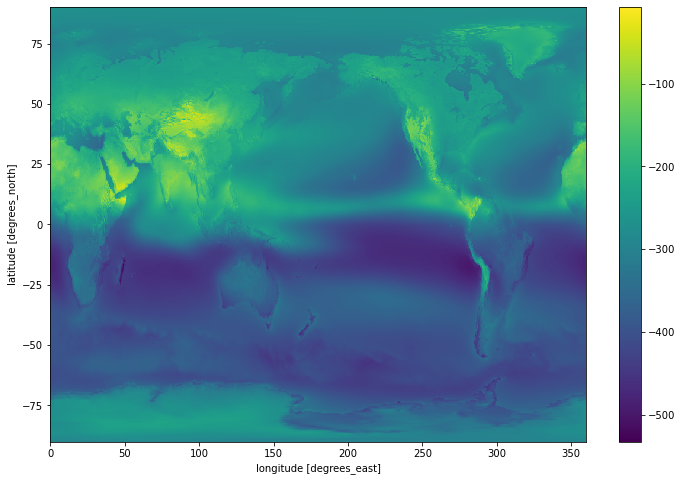

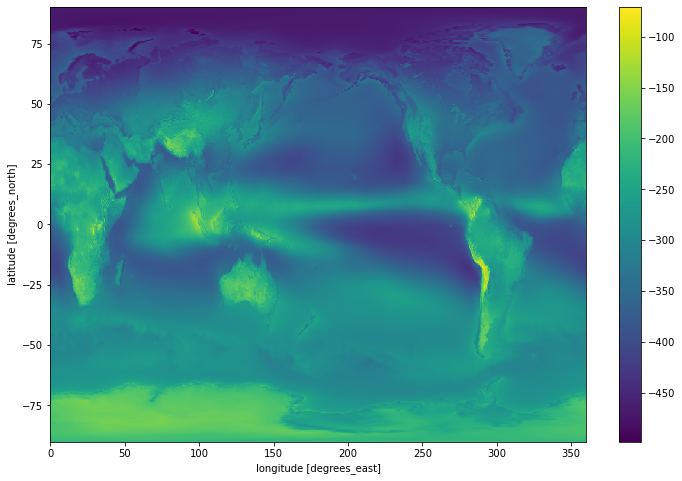

In [29]:
(djf['tsr']+djf['ttr']-djf['ssr']-djf['str']).plot(aspect=1.5,size=8)
(mam['tsr']+mam['ttr']-mam['ssr']-mam['str']).plot(aspect=1.5,size=8)
(jja['tsr']+jja['ttr']-jja['ssr']-jja['str']).plot(aspect=1.5,size=8)
(son['tsr']+son['ttr']-son['ssr']-son['str']).plot(aspect=1.5,size=8)

In [31]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_radcs_1979_2020.nc'
time_norm = 86400

with xr.open_dataset(filesource) as ds:
        jancs = sum(ds[dict(time=12*y)] for y in range(0,42))/(time_norm*42)
        febcs = sum(ds[dict(time=12*y+1)] for y in range(0,42))/(time_norm*42)
        marcs = sum(ds[dict(time=12*y+2)] for y in range(0,42))/(time_norm*42)
        aprcs = sum(ds[dict(time=12*y+3)] for y in range(0,42))/(time_norm*42)
        maycs = sum(ds[dict(time=12*y+4)] for y in range(0,42))/(time_norm*42)
        juncs = sum(ds[dict(time=12*y+5)] for y in range(0,42))/(time_norm*42)
        julcs = sum(ds[dict(time=12*y+6)] for y in range(0,42))/(time_norm*42)
        augcs = sum(ds[dict(time=12*y+7)] for y in range(0,42))/(time_norm*42)
        sepcs = sum(ds[dict(time=12*y+8)] for y in range(0,42))/(time_norm*42)
        octcs = sum(ds[dict(time=12*y+9)] for y in range(0,42))/(time_norm*42)
        novcs = sum(ds[dict(time=12*y+10)] for y in range(0,42))/(time_norm*42)
        deccs = sum(ds[dict(time=12*y+11)] for y in range(0,42))/(time_norm*42)

djfcs = jancs+febcs+deccs
mamcs = marcs+aprcs+maycs
jjacs = juncs+julcs+augcs
soncs = sepcs+octcs+novcs

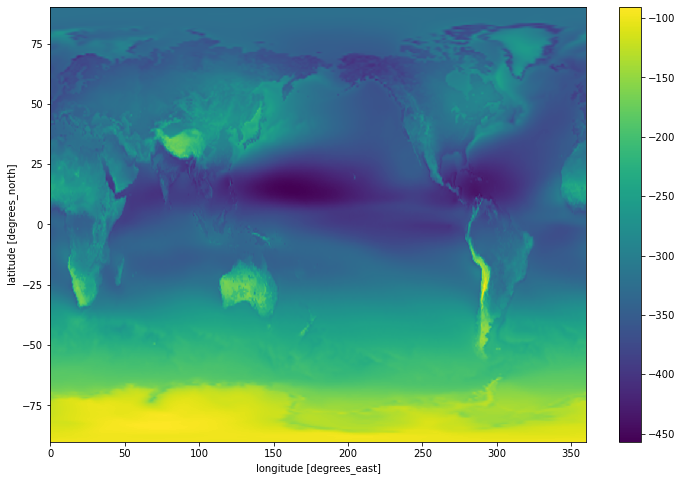

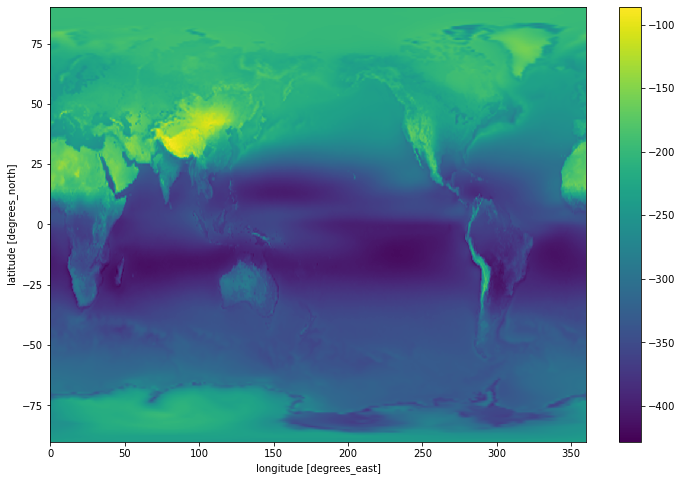

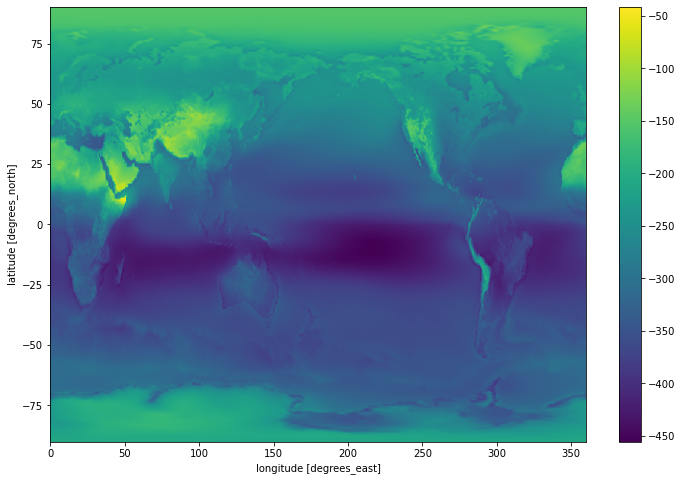

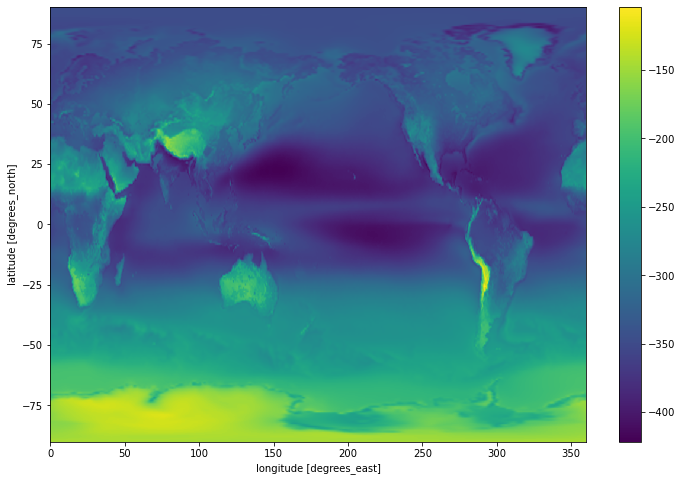

In [33]:
(djfcs['tsrc']+djfcs['ttrc']-djfcs['ssrc']-djfcs['strc']).plot(aspect=1.5,size=8)
(mamcs['tsrc']+mamcs['ttrc']-mamcs['ssrc']-mamcs['strc']).plot(aspect=1.5,size=8)
(jjacs['tsrc']+jjacs['ttrc']-jjacs['ssrc']-jjacs['strc']).plot(aspect=1.5,size=8)
(soncs['tsrc']+soncs['ttrc']-soncs['ssrc']-soncs['strc']).plot(aspect=1.5,size=8)

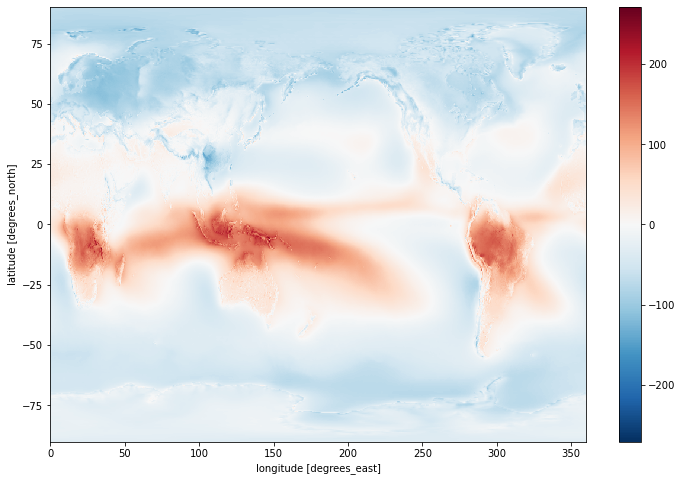

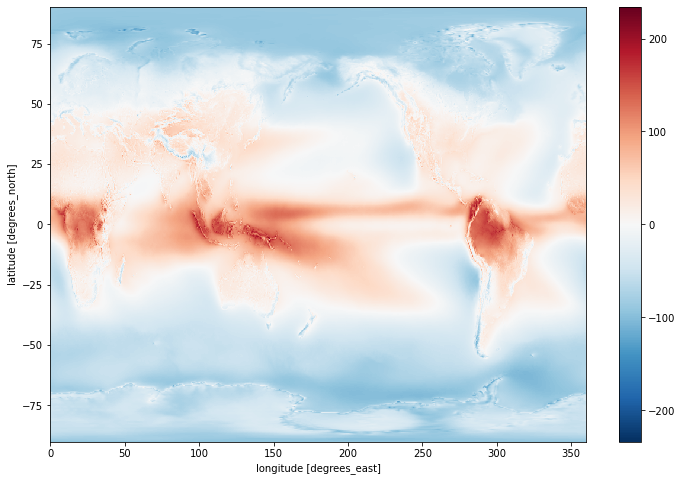

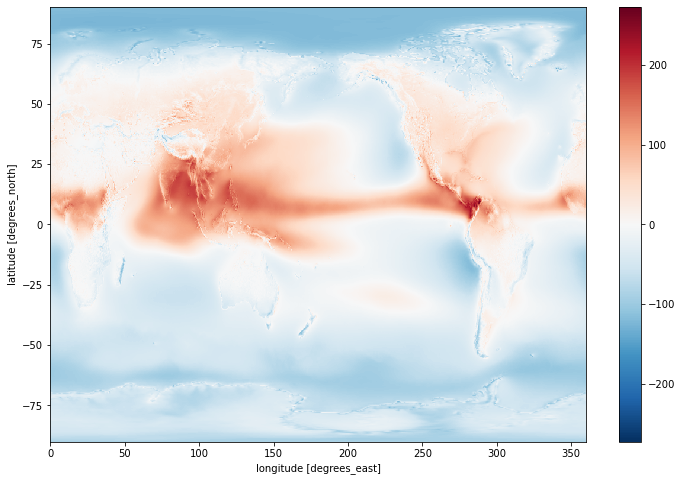

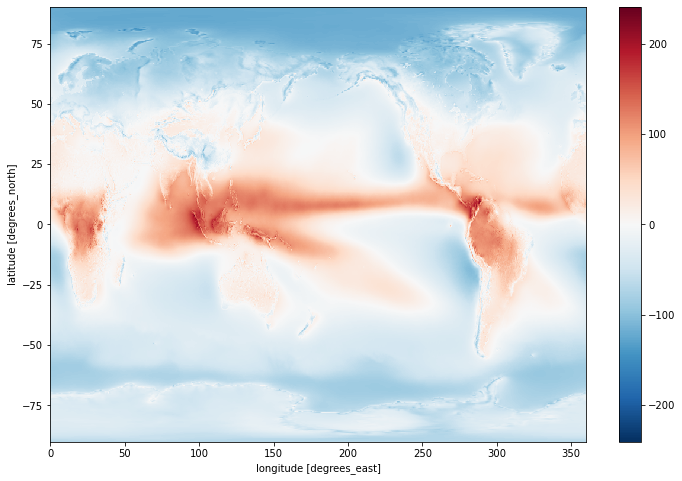

In [34]:
(djf['tsr']-djfcs['tsrc']+djf['ttr']-djfcs['ttrc']-djf['ssr']+djfcs['ssrc']-djf['str']+djfcs['strc']).plot(aspect=1.5,size=8)
(mam['tsr']-mamcs['tsrc']+mam['ttr']-mamcs['ttrc']-mam['ssr']+mamcs['ssrc']-mam['str']+mamcs['strc']).plot(aspect=1.5,size=8)
(jja['tsr']-jjacs['tsrc']+jja['ttr']-jjacs['ttrc']-jja['ssr']+jjacs['ssrc']-jja['str']+jjacs['strc']).plot(aspect=1.5,size=8)
(son['tsr']-soncs['tsrc']+son['ttr']-soncs['ttrc']-son['ssr']+soncs['ssrc']-son['str']+soncs['strc']).plot(aspect=1.5,size=8)